# Make Figure 5B:  Uniqueness of trans effect

Create a bar/dumbell plot to look at the number of genes that are significant in one or multiple cancers. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

import cptac
import cptac.utils as u
import plot_utils as p

In [2]:
print('cptac version:', cptac.version())

cptac version: 1.0.0


# Step 1: Create sig column

The sig column names all cancers with a sig comparison for a protein. First, get a df with p-values and differential expressions for all proteins across all 8 cancers.

In [3]:
all_df = pd.read_csv("csv/all_proteins_pancan.csv")
all_df

,Umich_Proteomics,GBM_P_Value,GBM_Median,HNSCC_P_Value,HNSCC_Median,LUAD_P_Value,LUAD_Median,LSCC_P_Value,LSCC_Median,BR_P_Value,BR_Median,EC_P_Value,EC_Median,OV_P_Value,OV_Median,CO_P_Value,CO_Median
0,CUL2,4.572167e-07,-0.458427,0.492948,-0.012483,0.758997,-0.041117,0.067696,-0.169872,0.998904,-0.029970,0.984953,0.024522,0.993388,0.042732,0.947155,0.076786
1,DOCK1_1,4.572167e-07,-0.358361,0.941940,-0.050514,0.817118,-0.064115,0.709095,-0.014096,NaN,0.219703,0.913592,0.105104,NaN,-0.112346,NaN,NaN
2,PIP4K2A,2.291619e-06,-0.494985,0.256964,-0.262982,0.948819,0.024972,0.032626,-0.223758,0.998904,-0.150441,0.203393,0.189661,0.993388,0.032562,0.721495,0.005104
3,CUTC,2.291619e-06,-0.490992,0.043479,-0.384810,0.406479,-0.280224,0.011289,-0.231417,0.998904,-0.049364,0.750590,-0.001645,0.993388,-0.186534,0.190516,-0.170226
4,ATE1_1,2.291619e-06,-0.481942,0.112081,-0.118994,0.012016,-0.315236,0.001442,-0.206647,0.998904,-0.232533,0.760815,0.032292,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,TRPM6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16552,TSPAN10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476133
16553,TTLL10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.140674
16554,UGT1A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.116468


In [4]:
# create sig column values to show cancers with sig tests for each protein
for index, row in all_df.iterrows():
    cancer_names = ['GBM','HNSCC','LUAD','LSCC','BR','EC']
    label = []
    for cancer in cancer_names:
        if row[cancer+'_P_Value'] < 0.05:
            label.append(str(cancer))
    labeled = '_'.join(label)
    all_df.loc[index,'sig'] = str(labeled)
all_df[['Umich_Proteomics', 'sig']].head()

cptac warning: Your version of cptac (1.0.0) is out-of-date. Latest is 1.1.0. Please run 'pip install --upgrade cptac' to update it. (C:\Users\mtstu\anaconda3\envs\dev\lib\threading.py, line 910)


,Umich_Proteomics,sig
0,CUL2,GBM
1,DOCK1_1,GBM
2,PIP4K2A,GBM_LSCC
3,CUTC,GBM_HNSCC_LSCC
4,ATE1_1,GBM_LUAD_LSCC


# Step 2: Keep genes significant in at least one cancer

First create the numSig column that counts the number of cancers with a significant test for the specific gene. 

In [5]:
def Pvalue_sig(row):
    numSig = 0

    for item in row:
        if pd.isnull(item):
            continue
        if item < 0.05: 
            numSig += 1
            
    return numSig

In [6]:
# Create Num_sig column
all_df["Num_sig"] = all_df.loc[:,["GBM_P_Value","HNSCC_P_Value","LUAD_P_Value","LSCC_P_Value", "BR_P_Value","EC_P_Value"]].apply(Pvalue_sig, axis = 1)
all_df = all_df.sort_values(by=['Num_sig'],ascending=False)

#Keep trans genes that are significant in atleast 1 cancer. 
all_df1 = all_df[all_df['Num_sig'].isin([1,2,3,4,5,6,7,8])]
all_df1.head()
all_df1.sig.value_counts()

LSCC                 936
GBM                  503
EC                   436
LSCC_EC              122
GBM_LSCC              62
HNSCC                 18
GBM_EC                18
LUAD                  12
HNSCC_LSCC             7
GBM_HNSCC_LSCC         5
GBM_LSCC_EC            5
GBM_HNSCC              5
HNSCC_LSCC_EC          4
GBM_HNSCC_LSCC_EC      2
HNSCC_EC               2
GBM_LUAD               2
LUAD_LSCC              2
GBM_LUAD_LSCC          1
Name: sig, dtype: int64

In [7]:
all_df[['BR_P_Value']].value_counts() #.loc[all_df['BR_P_Value'] <= 0.5]

BR_P_Value
0.998904      8769
0.999184        29
0.999230        17
0.998922         4
0.736793         3
0.999239         2
0.999276         2
0.999412         2
0.839800         1
0.999259         1
0.999709         1
0.999713         1
0.999863         1
dtype: int64

# Step 3: Get df with total counts of significant genes

Get count of sig genes for each unique label of a single cancer or multiple cancers in the sig column. 
* NOTE: Lscc has 3 significant genes that are also significnat in other cancers. They are only counted in the overlapping columns and Lscc alone shows 0 unique genes. (See columns: Gbm_Hnscc_Lscc, Gbm_Lscc, Luad_Lscc) 

In [8]:
# Count the number of unique values in sig
vc = all_df1['sig'].value_counts()
df = vc.to_frame()
df.index

Index(['LSCC', 'GBM', 'EC', 'LSCC_EC', 'GBM_LSCC', 'HNSCC', 'GBM_EC', 'LUAD',
       'HNSCC_LSCC', 'GBM_HNSCC_LSCC', 'GBM_LSCC_EC', 'GBM_HNSCC',
       'HNSCC_LSCC_EC', 'GBM_HNSCC_LSCC_EC', 'HNSCC_EC', 'GBM_LUAD',
       'LUAD_LSCC', 'GBM_LUAD_LSCC'],
      dtype='object')

In [9]:
# Add cancers with no significant genes.
no_sig = {'CO': 0, 'BR': 0, 'OV': 0}
ns_df = pd.DataFrame.from_dict(no_sig, orient = 'index', columns=['sig'])

# Append not sig cancers
both = df.append(ns_df)

# Reindex to keep single cancers together
ordered = ['GBM', 'HNSCC', 'EC', 'LUAD', 'LSCC', 'OV', 'BR', 'CO', 
           'LSCC_EC', 'GBM_LSCC', 'GBM_EC', 'HNSCC_LSCC', 'GBM_LSCC_EC', 
           'GBM_HNSCC_LSCC', 'GBM_HNSCC', 'HNSCC_LSCC_EC', 'HNSCC_EC',
           'GBM_HNSCC_LSCC_EC', 'GBM_LUAD', 'LUAD_LSCC', 'GBM_LUAD_LSCC']
           
both = both.reindex(ordered)

both = both.reset_index()
both = both.rename(columns = {'index': 'cancer'})
both

,cancer,sig
0,GBM,503
1,HNSCC,18
2,EC,436
3,LUAD,12
4,LSCC,936
5,OV,0
6,BR,0
7,CO,0
8,LSCC_EC,122
9,GBM_LSCC,62


# Step 4: Create bar and dumbell plot

First, create a df with 4 y-axis points for the scatterplots. Values represent where the cancer label is on the y-axis. ('GBM': 7, 'HNSCC': 6, 'EC': 5, 'LUAD': 4, 'LSCC': 3, 'OV': 2, 'BR': 1, 'CO': 0) For a single cancer all 4 points are the same. For proteins that are significant in 4 cancers, each y-axis point represents a different cancer. NOTE: PTEN contains genes significant in up to 4 cancers.


In [10]:
# Create df with location of cancer points
y_points = {'GBM': 7, 'HNSCC': 6, 'EC': 5, 'LUAD': 4, 'LSCC': 3, 'OV': 2, 'BR': 1, 'CO': 0}
y1 = {}
y2 = {}
y3 = {}
y4 = {}

for c in ordered:
    c_list = c.split('_')
    num_sig = len(c_list)
    # Get first y point
    cancer1 = c_list[0]
    y1[c] = y_points[cancer1]
    
    # get other y points - combinations of y2, y3, y4 points are the same int when there are not 4 multiple cancers
    if num_sig == 1:
        y2[c] = y_points[cancer1]
        y3[c] = y_points[cancer1]
        y4[c] = y_points[cancer1]
    
    if num_sig == 2:
        cancer2 = c_list[1]
        y2[c] = y_points[cancer2]
        y3[c] = y_points[cancer2]
        y4[c] = y_points[cancer2]
    
    if num_sig == 3 :
        cancer2 = c_list[1]
        cancer3 = c_list[2]
        y2[c] = y_points[cancer2]
        y3[c] = y_points[cancer3]
        y4[c] = y_points[cancer3]
        
    if num_sig == 4:
        cancer2 = c_list[1]
        cancer3 = c_list[2]
        cancer4 = c_list[3]
        y2[c] = y_points[cancer2]
        y3[c] = y_points[cancer3]
        y4[c] = y_points[cancer4]

In [11]:
# Create df with location of cancer points 
     
# Create dfs for each y-axis point
y1_df = pd.DataFrame.from_dict(y1, orient = 'index', columns=['y1'])
y2_df = pd.DataFrame.from_dict(y2, orient = 'index', columns=['y2'])
y3_df = pd.DataFrame.from_dict(y3, orient = 'index', columns=['y3'])
y4_df = pd.DataFrame.from_dict(y4, orient = 'index', columns=['y4'])

# Join dfs
y_points_df = y1_df.join(y2_df)
y_points_df = y_points_df.join(y3_df)
y_points_df = y_points_df.join(y4_df)
y_points_df

# Reindex to keep single cancers together
y_points_df = y_points_df.reindex(ordered)
y_points_df

,y1,y2,y3,y4
GBM,7,7,7,7
HNSCC,6,6,6,6
EC,5,5,5,5
LUAD,4,4,4,4
LSCC,3,3,3,3
OV,2,2,2,2
BR,1,1,1,1
CO,0,0,0,0
LSCC_EC,3,5,5,5
GBM_LSCC,7,3,3,3


Create bar plot and dumbell plot. x-axis of dumbell plot follows order of bar plot. 

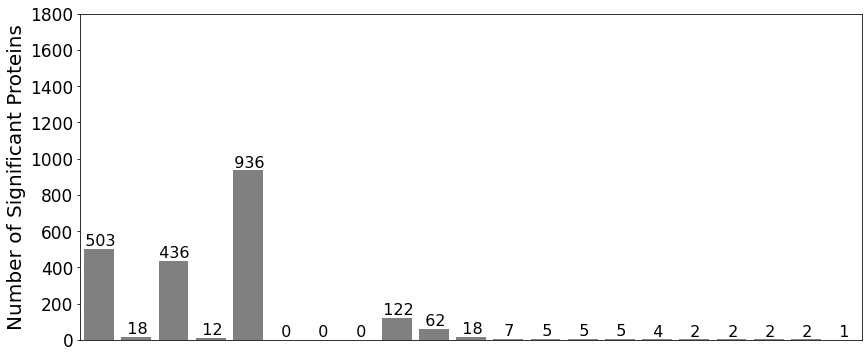

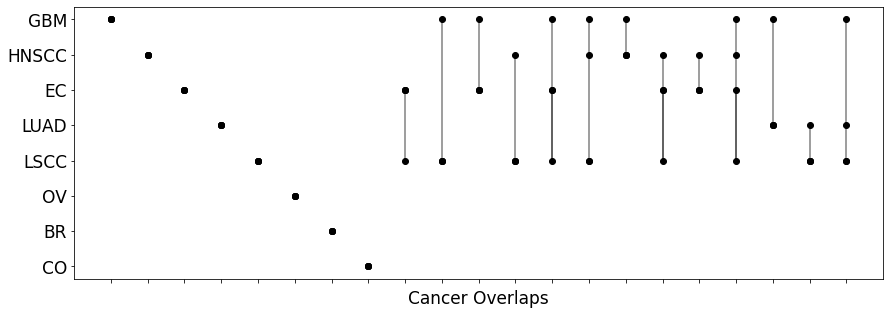

In [12]:
# Bar Plot
plt.figure(figsize=(14,6))
o = sns.barplot(x=both['cancer'], y=both['sig'], data=both, color='grey')
plt.setp(o.get_xticklabels(),rotation=90)

# Annotate count of sig genes above each bar
for p in o.patches:
    o.annotate('  {:.0f}'.format(p.get_height()), xy = (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom', color= 'black',size = 16)

o.set(ylim=(0, 1800))
o.set_xlabel('', size = 17)
o.set_ylabel('Number of Significant Proteins', size = 20)
o.get_xaxis().set_visible(False) # Hide x-axis
o.yaxis.set_tick_params(labelsize=17)



# Dumbell Plot
# Create vertical dumbell plot using scatterplots
plt.rcParams.update({'font.size': 17})
d = plt.figure(figsize=(14.5,5))
my_range=range(1,len(y_points_df.index)+1) #range count for x axis num
d = plt.vlines(x=my_range, ymin=y_points_df['y1'], ymax=y_points_df['y2'], color='black', alpha=0.5) #vertical lines
d = plt.vlines(x=my_range, ymin=y_points_df['y2'], ymax=y_points_df['y3'], color='black', alpha=0.5)
d = plt.vlines(x=my_range, ymin=y_points_df['y3'], ymax=y_points_df['y4'], color='black', alpha=0.5)

d = plt.scatter(my_range, y_points_df['y1'], color='black', alpha=1) #plots first point
d = plt.scatter(my_range, y_points_df['y2'], color='black', alpha=1) # plots second point
d = plt.scatter(my_range, y_points_df['y3'], color='black', alpha=1) # plots third point
d = plt.scatter(my_range, y_points_df['y4'], color='black', alpha=1) # plots fourth point

# Add title and axis names
labels = list(y_points_df.index[:8]) # label 8 single cancer names y axis
labels.reverse()
plt.xticks(my_range, []) #none for x axis
plt.yticks(range(0,8), labels) # single cancer names
#plt.ylabel('Cancer')
plt.xlabel('Cancer Overlaps')

o.figure.savefig("Fig_5B_1.png", dpi = 300)
d.figure.savefig("Fig_5B_2.png", dpi = 300)

# Get total number of proteins significant in at least one cancer

In [13]:
#Keep proteins that are significant in at least 1 cancer. 
total = all_df[all_df['Num_sig'].isin([1,2,3,4,5,6,7,8])]
total_count = len(total.Umich_Proteomics.unique())
print('Total significant proteins in at least one cancer:', total_count)

Total significant proteins in at least one cancer: 2142


# Calculate percentage of proteins significant in only one cancer

In [14]:
#Keep proteins that are significant in 1 cancer. 
one = all_df[all_df['Num_sig'].isin([1])]
one_count = len(one.Umich_Proteomics.unique())
print('Significant proteins in only one cancer:', one_count)
print('Percent:', one_count / total_count * 100)

Significant proteins in only one cancer: 1905
Percent: 88.93557422969187


# Calculate percentage of proteins significant in multiple cancers

In [15]:
#Keep proteins that are significant in multiple cancers. 
mult = all_df[all_df['Num_sig'].isin([2,3])]
mult_count = len(mult.Umich_Proteomics.unique())
print('Significant proteins in multiple cancers:', mult_count)
print('Percent:', mult_count / total_count * 100)

Significant proteins in multiple cancers: 235
Percent: 10.971055088702148


In [16]:
#Keep proteins that are significant in 3 cancers. 
three = all_df[all_df['Num_sig'].isin([3])]
three_count = len(three.Umich_Proteomics.unique())
print('Significant proteins in 3 cancers:', three_count)
print('Percent:', three_count / total_count * 100)

Significant proteins in 3 cancers: 15
Percent: 0.700280112044818


In [17]:
#Keep proteins that are significant in 4 cancers. 
four = all_df[all_df['Num_sig'].isin([4])]
four_count = len(four.Umich_Proteomics.unique())
print('Significant proteins in 4 cancers:', four_count)
print('Percent:', four_count / total_count * 100)

Significant proteins in 4 cancers: 2
Percent: 0.09337068160597572
